# Experiment Analysis -  email Campaign

## Dataset Information

The data set contains one row for each customer that was part of the experiment during the March, 2021, with the following columns:

1. id - customer ID
2. group - the group the customer was assigned
    - 0 = control group (did not receive an email) 
    - 1 = test group (received an email)
3. make_decision - indicator for the customer make the decision 
    - 0 = no, the customer did not make a decision
    - 1 = yes, the customer did shop for homes
4. market - region for which the customer has received a budget
    - see the footer of our home page for the list of markets we operate within
    - only three markets are included in the data: atlanta, dallas, and phoenix
5. score - the customer’s credit score, ranging from 0 (low risk) to 1 (high risk) 
6. date - the date on which the email was sent

## Loading Python Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Loading Data

In [2]:
customers = pd.read_csv('campaign_results.csv')

## Data Exploration

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             100000 non-null  int64  
 1   group          100000 non-null  int64  
 2   make_decision  100000 non-null  int64  
 3   market         100000 non-null  object 
 4   score          100000 non-null  float64
 5   date           100000 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


***No missing values**

In [4]:
customers.head()

,id,group,make_decision,market,score,date
0,1,0,1,Los Angeles,0.45,3/17/21
1,2,1,0,Los Angeles,0.55,3/10/21
2,3,1,1,Los Angeles,0.55,3/4/21
3,4,1,1,San Francisco,0.20,3/3/21
4,5,1,1,San Francisco,0.15,3/1/21


In [5]:
customers.describe()

,id,group,make_decision,score
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.501100,0.500140,0.614840,0.583243
std,28867.656754,0.500002,0.486636,0.260430
min,1.000000,0.000000,0.000000,0.050000
25%,25000.750000,0.000000,0.000000,0.400000
50%,50000.500000,1.000000,1.000000,0.600000
75%,75000.250000,1.000000,1.000000,0.800000
max,100000.000000,1.000000,1.000000,0.950000


In [6]:
# Categorical Data

print('Markets:')
print(customers['market'].unique(),'\n')


customers['new_date_column'] = pd.to_datetime(customers['date'])

print('Date:')
print(customers['new_date_column'].min())
print(customers['new_date_column'].max())


Markets:
['Los Angeles' 'San Francisco' 'Sacramento'] 

Date:
2021-03-01 00:00:00
2021-03-30 00:00:00


In [7]:
# Information

print("Total of customers: {}".format(customers['id'].count()))
print("Number of customers who received an email: {}".format(customers[customers['group']==1]['group'].count()))
print("Number of customers who did not receive an email: {}".format(customers[customers['group']==0]['group'].count()))

print("Percentage of customers who received an email: {}%".
      format((customers[customers['group']==1]['group'].count()*100)/customers['group'].count()))
print("Percentage of customers who not to receive an email: {}%".
      format((customers[customers['group']==0]['group'].count()*100)/customers['group'].count()))

Total of customers: 100000
Number of customers who received an email: 50014
Number of customers who did not receive an email: 49986
Percentage of customers who received an email: 50.014%
Percentage of customers who not to receive an email: 49.986%


In [8]:
# Number of customers per market 

print('Number of customers per market')
customers.groupby('market')['id'].agg(['count']).style.format('{0:,.0f}')

Number of customers per market


,count
market,
Los Angeles,"59,895"
Sacramento,"10,090"
San Francisco,"30,015"


In [9]:
# make_decision
# 0 = no, the customer did not make a decision
# 1 = yes, the customer did make a decision

print('Percentage of customers per make decision indicator')

total = customers['id'].count()
customers.groupby(['make_decision'])['id'].agg(['count']) * 100 / total

Percentage of customers per make decision indicator


,count
make_decision,
0,38.516
1,61.484


In [10]:
# For visualization purpose, I added some columns to label group and make_decision columns

# Labeling
dic_group = {0:'Control', 1:'Test'}
customers['group_name'] = customers['group'].apply(lambda x: dic_group[x])

dic_home_shop = {0:'No', 1:'Yes'}
customers['decision'] = customers['make_decision'].apply(lambda x: dic_home_shop[x])

customers.head()


,id,group,make_decision,market,score,date,new_date_column,group_name,decision
0,1,0,1,Los Angeles,0.45,3/17/21,2021-03-17,Control,Yes
1,2,1,0,Los Angeles,0.55,3/10/21,2021-03-10,Test,No
2,3,1,1,Los Angeles,0.55,3/4/21,2021-03-04,Test,Yes
3,4,1,1,San Francisco,0.20,3/3/21,2021-03-03,Test,Yes
4,5,1,1,San Francisco,0.15,3/1/21,2021-03-01,Test,Yes


## Data Visualization

count    100000.000000
mean          0.583243
std           0.260430
min           0.050000
25%           0.400000
50%           0.600000
75%           0.800000
max           0.950000
Name: score, dtype: float64


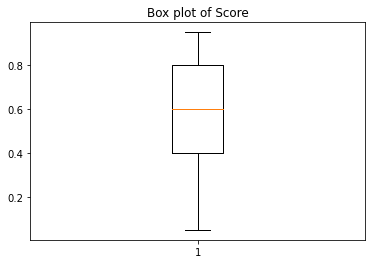

In [11]:
# Continuous Variable: Score

print(customers['score'].describe())
plt.boxplot(customers['score'])
plt.title("Box plot of Score")
plt.show()


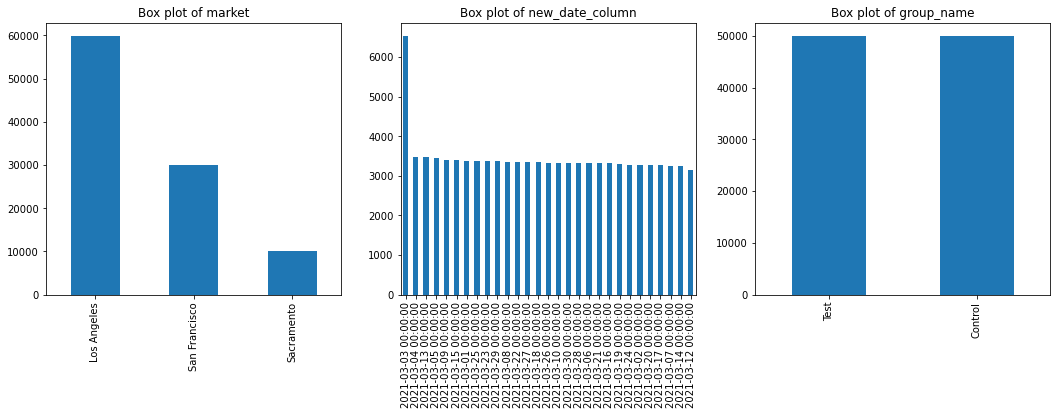

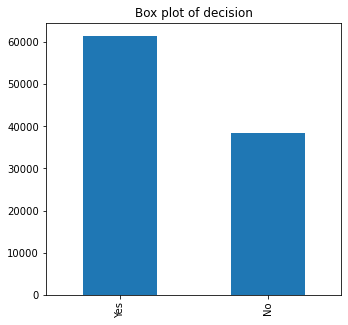

In [12]:
# Categorical Variables: market, group_name and home_shop


cols = customers.drop(['id','score','date','make_decision','group'], axis=1).columns

i=0

while i < len(cols):
    
    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    customers[cols[i]].value_counts().plot.bar()
    title = 'Box plot of ' + str(cols[i])
    plt.title(title)
    
    if i+1 < len(cols):
        plt.subplot(1,3,2)
        customers[cols[i+1]].value_counts().plot.bar()
        title = 'Box plot of ' +  str(cols[i+1])
        plt.title(title)

    if i+2 < len(cols):
        plt.subplot(1,3,3)
        customers[cols[i+2]].value_counts().plot.bar()
        title = 'Box plot of ' +  str(cols[i+2])
        plt.title(title)

    i+=3
    
plt.show()

Average Score per Market 

market
Los Angeles      0.582909
Sacramento       0.586313
San Francisco    0.582879
Name: score, dtype: float64


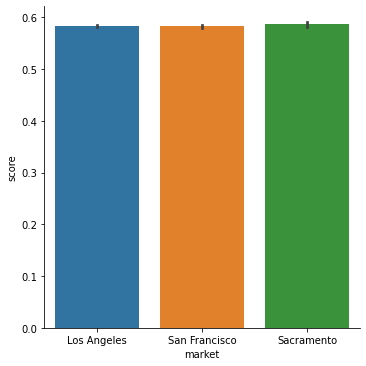

In [13]:
# Relationship between Score and Market

print('Average Score per Market', '\n')
print(customers.groupby(['market'])['score'].mean())
sns.catplot(x="market", y="score", kind="bar",  data=customers)


Average Score per Group  

group_name
Control    0.583709
Test       0.582778
Name: score, dtype: float64


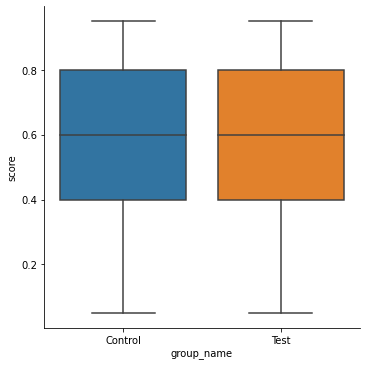

In [14]:
# Relationship between Score and Group 

print('Average Score per Group ', '\n')
print(customers.groupby(['group_name'])['score'].mean())
sns.catplot(x="group_name", y="score",  kind="box", data=customers)

Average Score per Make Decision Indicator 

decision
No     0.568030
Yes    0.592774
Name: score, dtype: float64


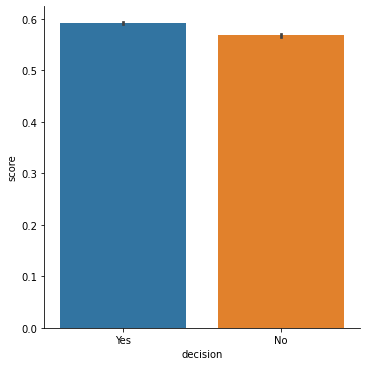

In [15]:
# Relationship between Score and Home Shop Decision

print('Average Score per Make Decision Indicator', '\n')
print(customers.groupby(['decision'])['score'].mean())
sns.catplot(x="decision", y="score", kind="bar", data=customers)

Number of applicants per market per group
                          count
market        group_name       
Los Angeles   Control     29895
              Test        30000
Sacramento    Control      5085
              Test         5005
San Francisco Control     15006
              Test        15009


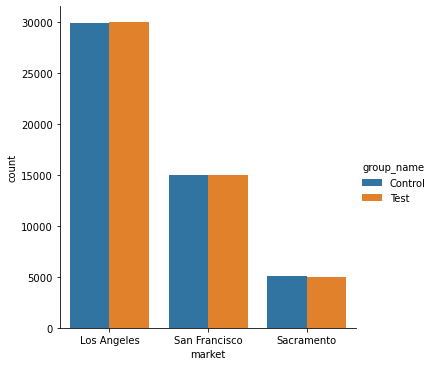

In [16]:
# Relationship between Market and Group Name

print('Number of applicants per market per group')
print(customers.groupby(['market','group_name'])['id'].agg(['count']))

sns.catplot(x="market",  hue="group_name", kind="count",  data=customers)

Number of customers per market per make decision
                        count
market        decision       
Los Angeles   No        17304
              Yes       42591
Sacramento    No         6469
              Yes        3621
San Francisco No        14743
              Yes       15272


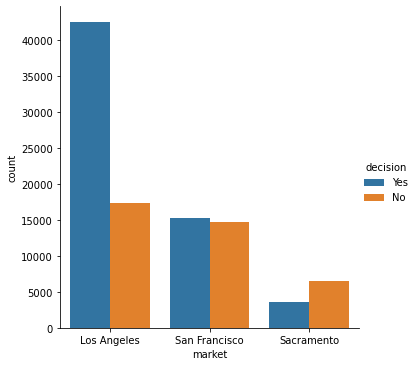

In [17]:
# Relationship between Market and Make Decision Indicator

print('Number of customers per market per make decision')
print(customers.groupby(['market','decision'])['id'].agg(['count']))

sns.catplot(x="market",  hue="decision", kind="count",  data=customers)

Number of customers per market per make decision indicator
                                   count
market        group_name decision       
Los Angeles   Control    No         9766
                         Yes       20129
              Test       No         7538
                         Yes       22462
Sacramento    Control    No         3272
                         Yes        1813
              Test       No         3197
                         Yes        1808
San Francisco Control    No         7450
                         Yes        7556
              Test       No         7293
                         Yes        7716


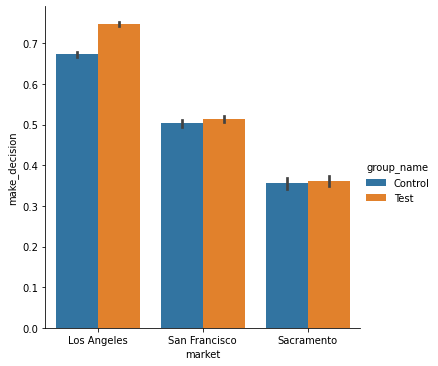

In [18]:
# Relationship between Market, Group and Make Decision

print('Number of customers per market per make decision indicator')
print(customers.groupby(['market','group_name','decision'])['id'].agg(['count']))

sns.catplot(x="market",y="make_decision", kind="bar", hue="group_name",  data=customers)

## Experiment Analysis

In [19]:
# Analyzig the data of the experiment

print('Number of customers per market per group')
customers.groupby(['market','group_name'])['id'].agg(['count']).style.format('{0:,.0f}')

Number of customers per market per group


In [20]:

print('Number of customers per market per make decision indicator')
customers.groupby(['market','decision'])['id'].agg(['count']).style.format('{0:,.0f}')

Number of customers per market per make decision indicator


## Analysis Result

In [21]:
# Crosstab with Number of customers per group who did or did not make decision

count_table_g = pd.crosstab(customers['group_name'], customers['decision'])
print('Number of customers per group who did or did not make a decision')
count_table_g

Number of customers per group who did or did not make a decision


decision,No,Yes
group_name,,
Control,20488,29498
Test,18028,31986


In [22]:
# Crosstab with make decision rate per market

count_table_g = pd.crosstab(customers['market'], customers['decision']).apply(lambda r: round(r/r.sum(),2), axis=1)
print('Make decision indicator rate per market')
count_table_g

Make decision indicator rate per market


decision,No,Yes
market,,
Los Angeles,0.29,0.71
Sacramento,0.64,0.36
San Francisco,0.49,0.51


In [23]:
#Crosstab of make decision rate per group

count_table_g = pd.crosstab(customers['group_name'], customers['decision']).apply(lambda r: round(r/r.sum(),2), axis=1)
print('Make decision rate per group')
count_table_g

Make decision rate per group


decision,No,Yes
group_name,,
Control,0.41,0.59
Test,0.36,0.64


**Between control and test groups, there is an increment of 4.94% on the number of applicants who did shop for home**

In [24]:
# Crosstab of home shopping rate per group, per market

count_table_g = pd.crosstab([customers['group_name'],customers['market']], 
                            customers['decision']).apply(lambda r: round(r/r.sum(),4), axis=1)

print('Make decision rate per group and market ')
count_table_g

Make decision rate per group and market 


decision                      No     Yes
group_name market                       
Control    Los Angeles    0.3267  0.6733
           Sacramento     0.6435  0.3565
           San Francisco  0.4965  0.5035
Test       Los Angeles    0.2513  0.7487
           Sacramento     0.6388  0.3612
           San Francisco  0.4859  0.5141

**Test groups for all markets present an increment on the number of customers who did make a decision for all markets**

### Test of Means Analysis - Control and Test Groups

In [25]:
# Overall Calculation

customer_not_decide = customers['make_decision'][customers['group']==0]
customer_decide = customers['make_decision'][customers['group']==1]

print(stats.ttest_ind(customer_not_decide, customer_decide))


Ttest_indResult(statistic=-16.07642208155314, pvalue=4.416208227786792e-58)


***The result of the test of means analysis gives p-value=4.416208227786792e-58 
that indicates there is a statistically significance difference between group means, this is how likely it is that result would have occurred by random chance ***

In [26]:
mkts = list(customers['market'].unique())

for mkt in mkts:
    
    cust_not_shop = customers['make_decision'][(customers['group']==0) & (customers['market']==mkt)]
    cust_shop = customers['make_decision'][(customers['group']==1) & (customers['market']==mkt)]
    
    print('Market: {}'.format(mkt.capitalize()))
    print(stats.ttest_ind(cust_not_shop, cust_shop),'\n')

Market: Los angeles
Ttest_indResult(statistic=-20.429268673318195, pvalue=1.90094987985161e-92) 

Market: San francisco
Ttest_indResult(statistic=-1.829763081890744, pvalue=0.0672952873759384) 

Market: Sacramento
Ttest_indResult(statistic=-0.49205430459965027, pvalue=0.6226916615211875) 



***The result of the tests of means analysis per market gave different p-values. Just for Los Angeles
the result indicates there is a statistically significance difference between groups means. For San Francisco and Sacramento, my recommendation is to increment the number of customers in the experiment***

## Conclusions

1. The result of the test of means analysis gives a p-value < 0.05, that indicates there is a statistically significance difference between group means

2. The p-value provides strong evidence that the increment on making-decision rate did not happen by chance

3. The overall result shows that there could be an increment on the make decision rate so, my recommendation is to rollout the email strategy in the rest of the markets

-----------------------------------
By: Wendy Navarrete

Date: 08/27/2021